<a href="https://colab.research.google.com/github/datacentertugaskuliah-coder/PraktikumDS/blob/main/Prediksi_Kekuatan_Tekan_Beton_Menggunakan_Regresi_Linearipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lima baris pertama data:
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in 

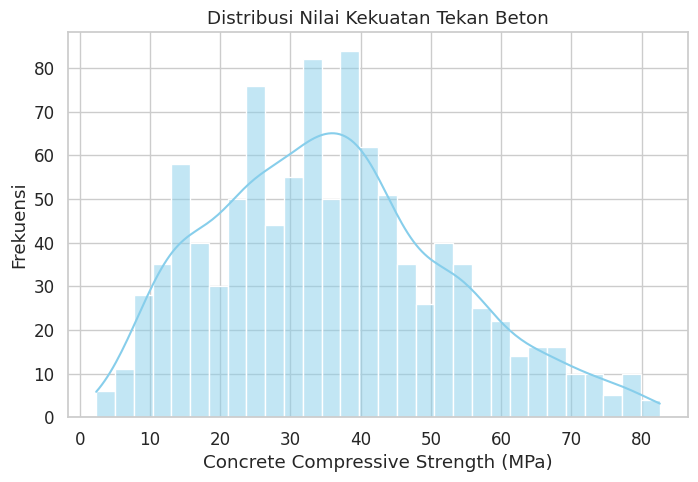

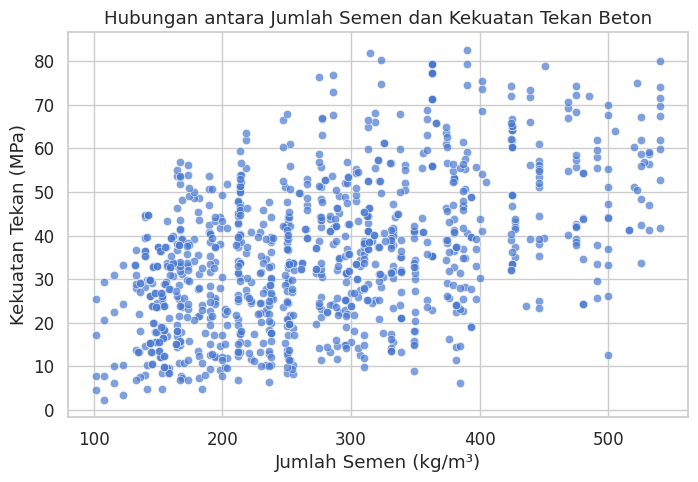

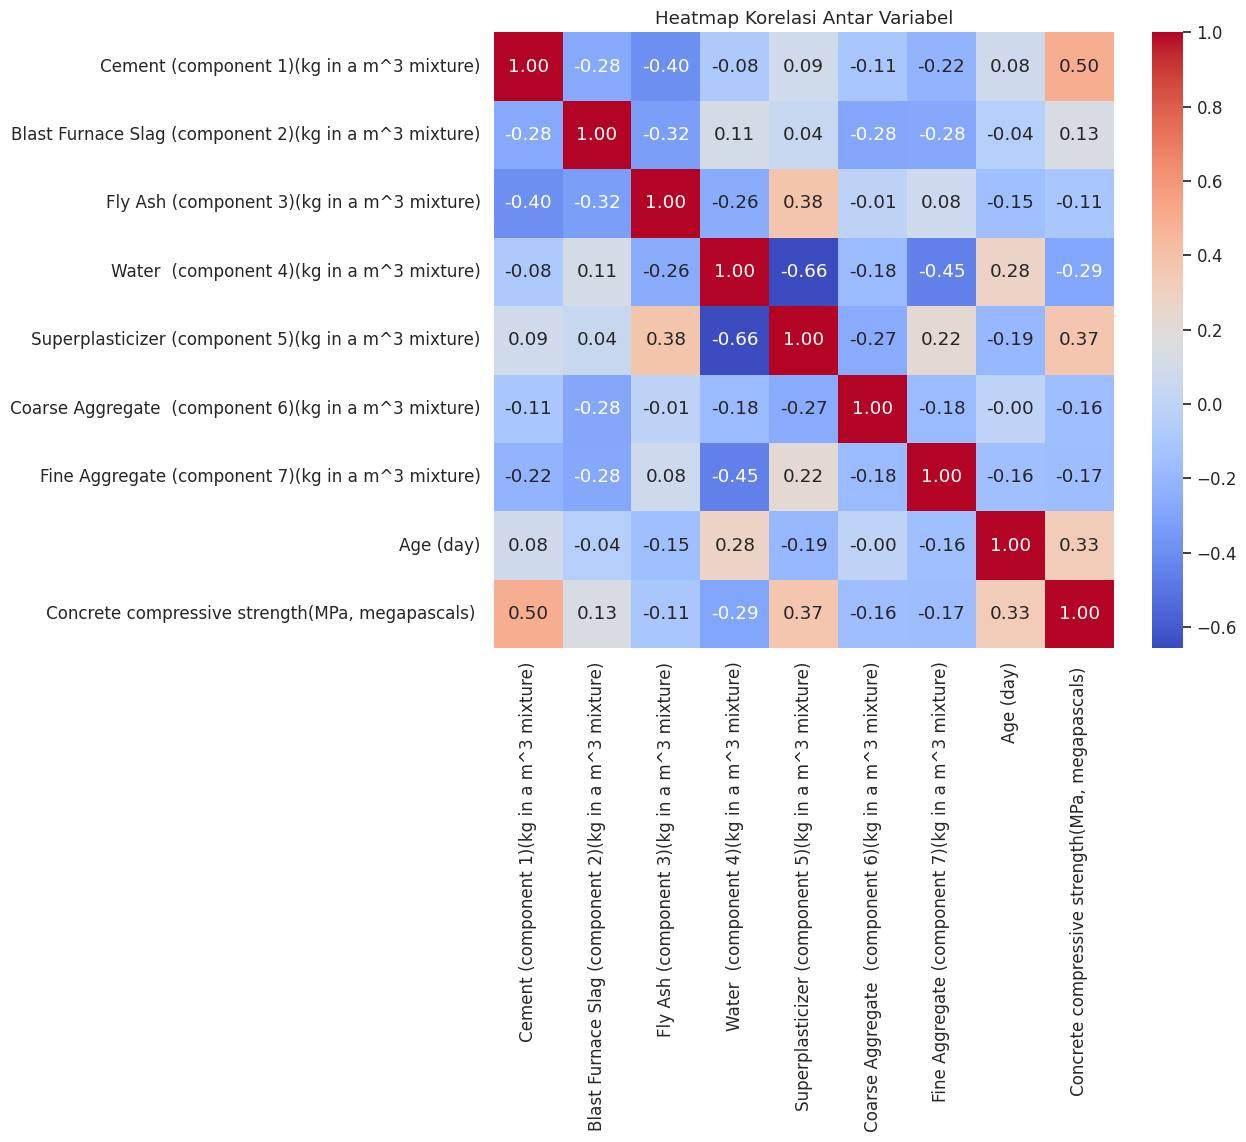

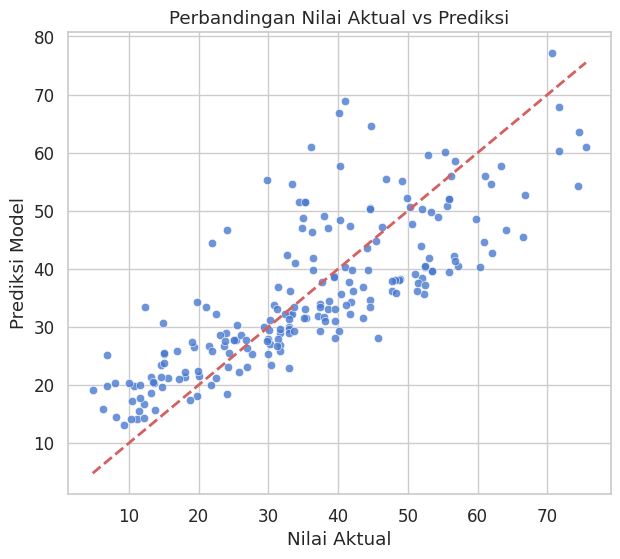


=== Contoh Prediksi Satu Sampel ===
Fitur input        : {'Cement (component 1)(kg in a m^3 mixture)': 266.0, 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 114.0, 'Fly Ash (component 3)(kg in a m^3 mixture)': 0.0, 'Water  (component 4)(kg in a m^3 mixture)': 228.0, 'Superplasticizer (component 5)(kg in a m^3 mixture)': 0.0, 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 932.0, 'Fine Aggregate (component 7)(kg in a m^3 mixture)': 670.0, 'Age (day)': 365}
Nilai sebenarnya   : 52.91
Prediksi model     : 59.66


In [2]:
# ==========================================================
# Judul Program : Prediksi Kekuatan Tekan Beton Menggunakan Regresi Linear dan Visualisasi Data
# Praktikum Data Science dan Machine Learning Berbasis Python dan UCI Repository
# Pertemuan : 2 – Regresi Linear pada Data Teknik
# Dataset : Concrete Compressive Strength – UCI Machine Learning Repository
# Repo : https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
# Lingkungan : Google Colab
# ==========================================================

# Tahap 1 – Import pustaka
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya visualisasi
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Tahap 2 – Memuat dataset dari UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
data = pd.read_excel(url)

print("Lima baris pertama data:")
print(data.head(), "\n")

# Tahap 3 – Analisis struktur data
print("Ukuran data (baris, kolom):", data.shape)
print("\nCek nilai hilang per kolom:")
print(data.isna().sum(), "\n")

print("Statistik deskriptif fitur numerik:")
print(data.describe(), "\n")

# Tahap 4 – Menentukan fitur dan target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print("Nama fitur yang digunakan:")
print(list(X.columns), "\n")

# Tahap 5 – Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji  :", X_test.shape, "\n")

# Tahap 6 – Melatih model Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Tahap 7 – Melakukan prediksi dan evaluasi model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Hasil Evaluasi Model Regresi Linear ===")
print(f"Mean Squared Error (MSE) : {mse:.4f}")
print(f"Root Mean Squared Error  : {rmse:.4f}")
print(f"R^2 Score                : {r2:.4f}")

# ==========================================================
# Tahap 8 – Visualisasi Data dan Hasil Model
# ==========================================================

# 8.1 Visualisasi distribusi target (kekuatan tekan beton)
plt.figure(figsize=(8,5))
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title("Distribusi Nilai Kekuatan Tekan Beton")
plt.xlabel("Concrete Compressive Strength (MPa)")
plt.ylabel("Frekuensi")
plt.show()

# 8.2 Visualisasi hubungan antara salah satu fitur utama dan target
plt.figure(figsize=(8,5))
sns.scatterplot(x=data["Cement (component 1)(kg in a m^3 mixture)"], y=y, alpha=0.7)
plt.title("Hubungan antara Jumlah Semen dan Kekuatan Tekan Beton")
plt.xlabel("Jumlah Semen (kg/m³)")
plt.ylabel("Kekuatan Tekan (MPa)")
plt.show()

# 8.3 Visualisasi korelasi antar fitur
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# 8.4 Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Perbandingan Nilai Aktual vs Prediksi")
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi Model")
plt.show()

# Tahap 9 – Contoh prediksi individual
contoh_fitur = X_test.iloc[[0]]
contoh_sebenarnya = y_test.iloc[0]
contoh_prediksi = model.predict(contoh_fitur)[0]

print("\n=== Contoh Prediksi Satu Sampel ===")
print("Fitur input        :", contoh_fitur.to_dict(orient='records')[0])
print("Nilai sebenarnya   :", round(contoh_sebenarnya, 2))
print("Prediksi model     :", round(contoh_prediksi, 2))

# ==========================================================
# Analisis:
# 1. Grafik distribusi menunjukkan variasi kekuatan tekan beton.
# 2. Scatter plot memperlihatkan hubungan linier positif antara
#    jumlah semen dan kekuatan beton.
# 3. Heatmap membantu mengidentifikasi fitur paling berpengaruh,
#    misalnya Cement dan Water.
# 4. Grafik prediksi vs aktual menunjukkan seberapa baik model
#    mendekati nilai nyata (semakin dekat garis merah, semakin baik).
# ==========================================================
